### Importar las librerías a utilizar


In [128]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Leer archivo de datos


In [129]:
datos = pd.read_csv("titanic3.csv")

In [130]:
datos.head()

# datos.count()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [131]:
datos.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [132]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [133]:
datos.shape

(1309, 14)

## Ejemplos de uso de Seaborn para explorar los datos


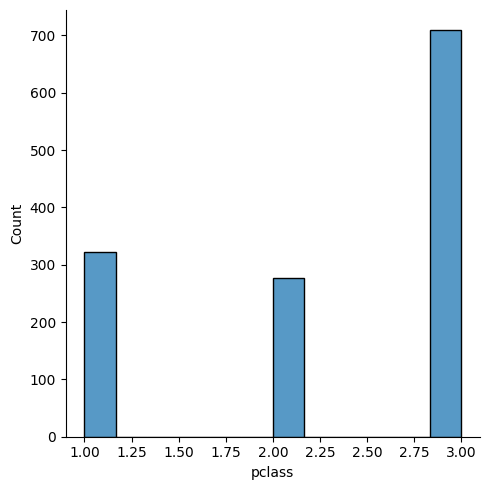

In [134]:
sns.displot(datos["pclass"])

<Axes: xlabel='sex', ylabel='count'>

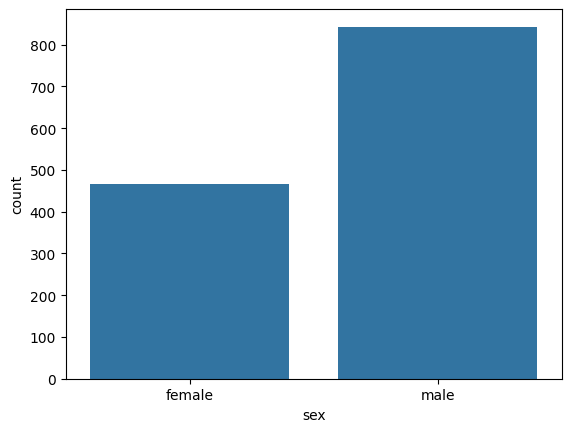

In [135]:
sns.countplot(x="sex", data=datos)

### Pura Magia


In [136]:
profile = ProfileReport(datos)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Toda la información que nos da este reporte, la podemos obtener directamente con instrucciones de Pandas...obviamente, es mucho más simple dar una sola instrucción.

### Conocemos los datos y ahora qué hacer para prepararlos (limpiarlos)?

Pandas tiene todas las instrucciones para:

1.  estandarizar los nombres de las variables
2.  eliminar datos faltantes
3.  eliminar registros duplicados
4.  crear nuevas variables
5.  etc.


### Eliminar columnas

La columna "body" normalmente no nos será útil, eliminémosla


In [137]:
print(datos.columns.tolist())


['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']


In [138]:
datos = datos.drop(columns=["body"])


### Cambiar el tipo de algunos datos

Varias de las columnas son categóricas, habrá que codificarlas


In [139]:
datos["sex"] = datos["sex"].map({"male": 0, "female": 1})

In [140]:
datos.head()

pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton    1   
1       1         1                   Allison, Master. Hudson Trevor    0   
2       1         0                     Allison, Miss. Helen Loraine    1   
3       1         0             Allison, Mr. Hudson Joshua Creighton    0   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1   

       age  sibsp  parch  ticket      fare    cabin embarked boat  \
0  29.0000      0      0   24160  211.3375       B5        S    2   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [141]:
datos["embarked"] = datos["embarked"].map({"C": 0, "Q": 1, "S": 2})

In [142]:
datos.head()

pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton    1   
1       1         1                   Allison, Master. Hudson Trevor    0   
2       1         0                     Allison, Miss. Helen Loraine    1   
3       1         0             Allison, Mr. Hudson Joshua Creighton    0   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1   

       age  sibsp  parch  ticket      fare    cabin  embarked boat  \
0  29.0000      0      0   24160  211.3375       B5       2.0    2   
1   0.9167      1      2  113781  151.5500  C22 C26       2.0   11   
2   2.0000      1      2  113781  151.5500  C22 C26       2.0  NaN   
3  30.0000      1      2  113781  151.5500  C22 C26       2.0  NaN   
4  25.0000      1      2  113781  151.5500  C22 C26       2.0  NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [143]:
print(datos[["sex", "embarked"]].head())

   sex  embarked
0    1       2.0
1    0       2.0
2    1       2.0
3    0       2.0
4    1       2.0


### Estandarizar los nombres de las columnas:


In [144]:
datos.columns = datos.columns.str.strip().str.lower().str.replace(".", "_")

print(datos.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'home_dest'],
      dtype='object')


### Eliminar filas duplicadas


In [145]:
# Eliminar filas duplicadas
datos = datos.drop_duplicates()

### Reemplazar valores faltantes


In [146]:
print(datos.isnull().sum())

# Rellenar columnas numéricas con la mediana
datos["age"] = datos["age"].fillna(datos["age"].median())
datos["fare"] = datos["fare"].fillna(datos["fare"].median())

# Rellenar columnas categóricas con valores adecuados
datos["cabin"] = datos["cabin"].fillna("Desconocido")
datos["boat"] = datos["boat"].fillna("Desconocido")
datos["home_dest"] = datos["home_dest"].fillna("Desconocido")

# Para 'embarked', usamos la moda (el valor más frecuente)
datos["embarked"] = datos["embarked"].fillna(datos["embarked"].mode()[0])

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
home_dest     564
dtype: int64


In [147]:
# Verificar nuevamente si quedan valores nulos
print(
    datos.isnull().sum()
)  # Debería devolver solo ceros si todo se llenó correctamente

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home_dest    0
dtype: int64


### Eliminar filas con valores faltantes


In [148]:
# Eliminar filas con valores faltantes
datos = datos.dropna()

# Verificar que no queden valores nulos
print("Valores nulos restantes por columna después de eliminar filas:")
print(datos.isnull().sum())

Valores nulos restantes por columna después de eliminar filas:
pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home_dest    0
dtype: int64


### Explorar los datos numéricos

Realizar Boxplots para cada uno


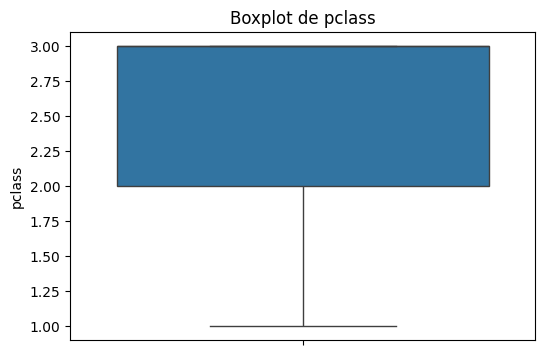

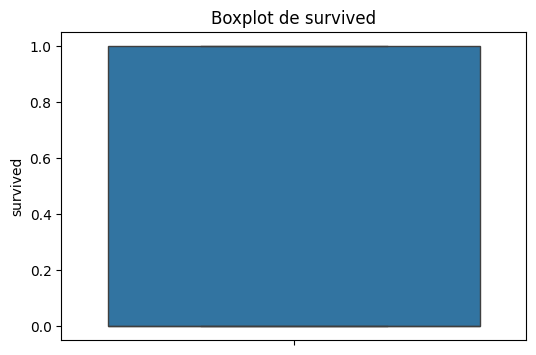

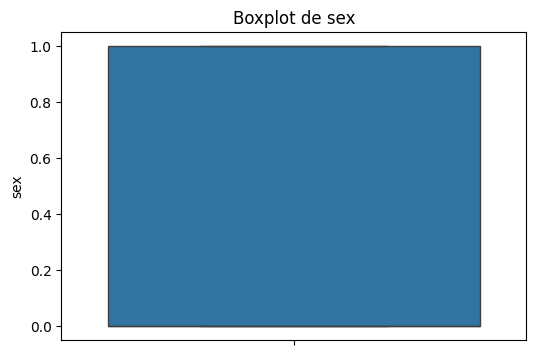

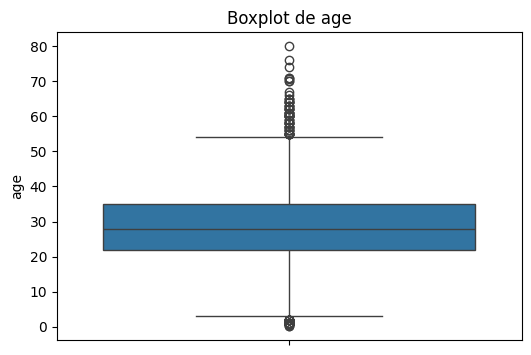

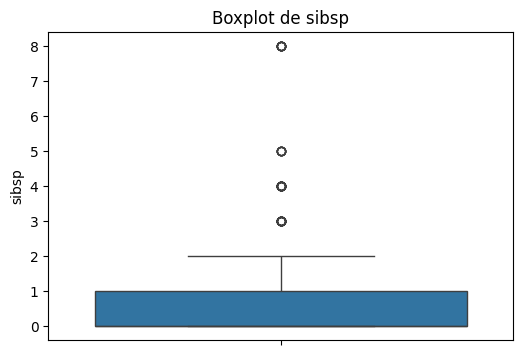

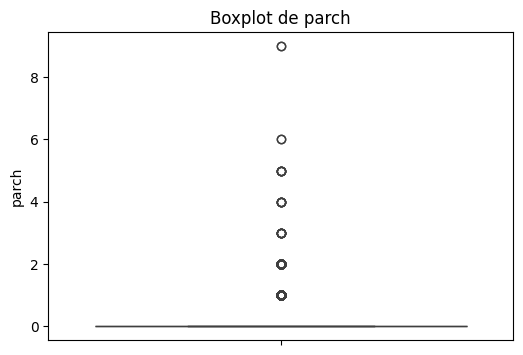

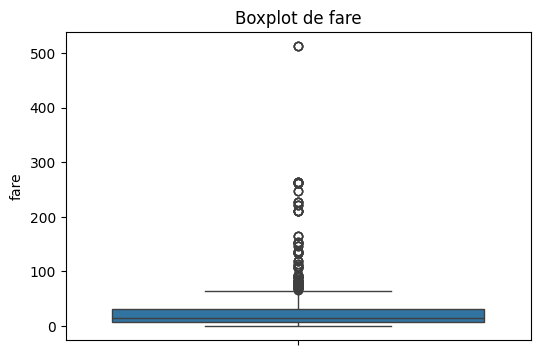

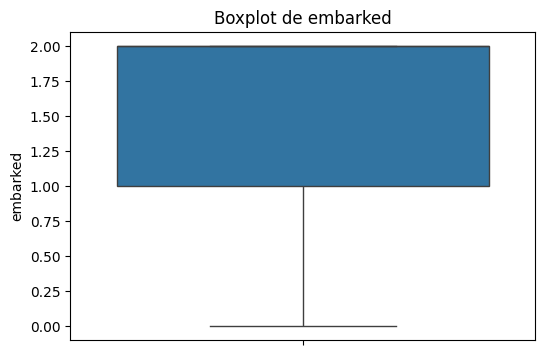

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=["number"])

# Crear un boxplot para cada columna numérica
for columna in datos_numericos.columns:
    plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
    sns.boxplot(y=datos[columna])
    plt.title(f"Boxplot de {columna}")
    plt.ylabel(columna)
    plt.show()

### Explorar los datos categóricos

Realizar gráficas de barras ej. de survived, sex


C:\Users\brand\AppData\Local\Temp\ipykernel_2144\2265242247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='survived', palette='viridis')


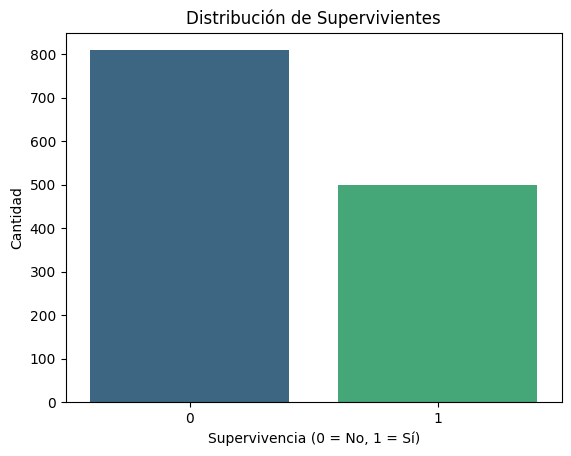

C:\Users\brand\AppData\Local\Temp\ipykernel_2144\2265242247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='sex', palette='magma')


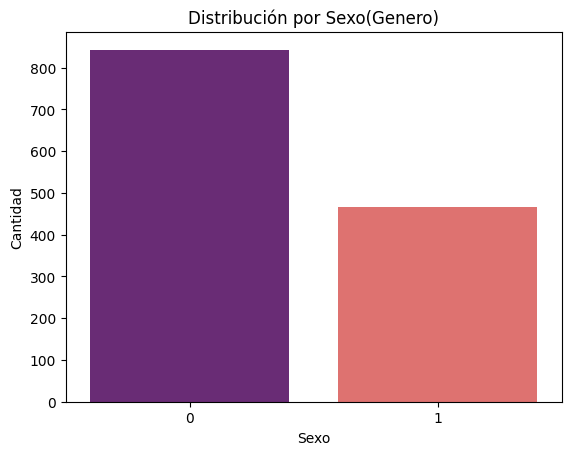

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfica de barras para la columna 'survived'
sns.countplot(data=datos, x='survived', palette='viridis')
plt.title('Distribución de Supervivientes')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Gráfica de barras para la columna 'sex'
sns.countplot(data=datos, x='sex', palette='magma')
plt.title('Distribución por Sexo(Genero)')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()


Contrastar variables categóricas, por ej. survived vs sex con gráfica de barras apiladas (stacked)


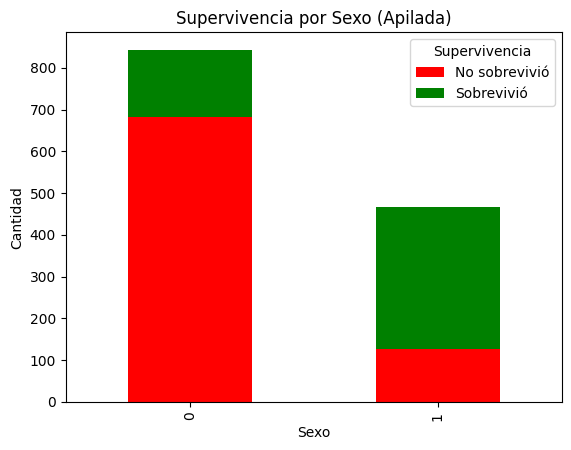

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una tabla cruzada para contar valores entre 'sex' y 'survived'
tabla_cruzada = pd.crosstab(datos['sex'], datos['survived'])

# Crear la gráfica de barras apiladas
tabla_cruzada.plot(kind='bar', stacked=True, color=['red', 'green'])

# Agregar título y etiquetas
plt.title('Supervivencia por Sexo (Apilada)')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(['No sobrevivió', 'Sobrevivió'], title='Supervivencia')

# Mostrar la gráfica
plt.show()


### Reducir la cardinalidad

Pueden haber columas con datos categóricos demasiados variados, se podría poner un límite de frecuencia de una categoría y las que no cumplen cambiarles a un valor ötros", o algo así


In [152]:
# Escoger la columna categórica a procesar (por ejemplo, 'home_dest')
columna = 'home_dest'

# Contar la frecuencia de cada categoría
frecuencia = datos[columna].value_counts()

# Establecer un límite de frecuencia (por ejemplo, 10)
limite = 10

# Reemplazar las categorías que no cumplen el límite por 'Otros'
datos[columna] = datos[columna].apply(lambda x: x if frecuencia[x] >= limite else 'Otros')

# Verificar el resultado
print(datos[columna].value_counts())


home_dest
Otros           657
Desconocido     564
New York, NY     64
London           14
Montreal, PQ     10
Name: count, dtype: int64


### Eliminar datos atípicos


In [153]:
# Seleccionar las columnas donde se eliminarán atípicos
columnas_a_limpiar = ['age', 'fare']

# Eliminar valores atípicos
for columna in columnas_a_limpiar:
    Q1 = datos[columna].quantile(0.25)  # Primer cuartil
    Q3 = datos[columna].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1                       # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtrar los datos dentro del rango permitido
    datos = datos[(datos[columna] >= limite_inferior) & (datos[columna] <= limite_superior)]

# Verificar dimensiones después de la limpieza
print("Datos después de limpiar atípicos: " + str(datos.shape))

Datos después de limpiar atípicos: (1055, 13)


# Preguntas extras

# 1. ¿Cuál sería el "precio medio de sobrevivir" dependiendo de la clase del pasajero?


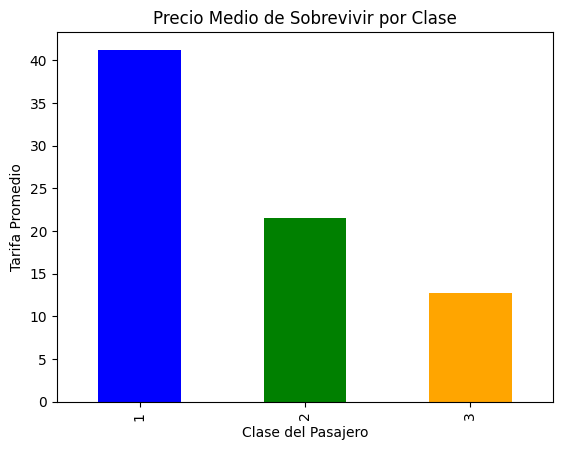

In [154]:
# 1. Precio medio de sobrevivir por clase
fare_survived = datos[datos['survived'] == 1].groupby('pclass')['fare'].mean()
fare_survived.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title("Precio Medio de Sobrevivir por Clase")
plt.xlabel("Clase del Pasajero")
plt.ylabel("Tarifa Promedio")
plt.show()

# 2. ¿Qué relación hay entre la edad y el número de familiares a bordo (sibsp + parch)?

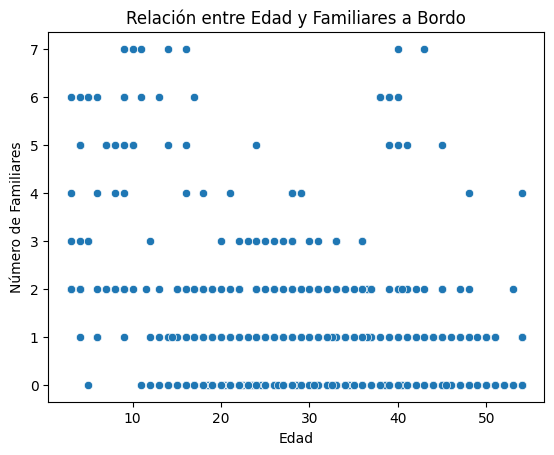

In [159]:

datos['family'] = datos['sibsp'] + datos['parch']
sns.scatterplot(x='age', y='family', data=datos)
plt.title("Relación entre Edad y Familiares a Bordo")
plt.xlabel("Edad")
plt.ylabel("Número de Familiares")
plt.show()

3. ¿Cuántas personas llamadas "Mr." sobrevivieron en comparación con "Miss." o "Mrs."?

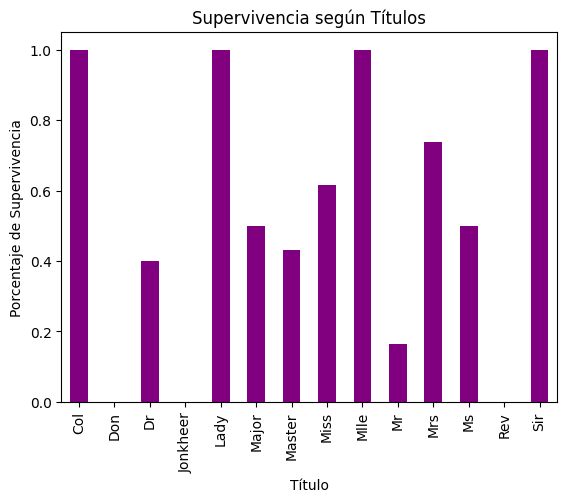

In [160]:

datos['title'] = datos['name'].str.extract(r', (\w+)\.', expand=False)
title_survival = datos.groupby('title')['survived'].mean()
title_survival.plot(kind='bar', color='purple')
plt.title("Supervivencia según Títulos")
plt.xlabel("Título")
plt.ylabel("Porcentaje de Supervivencia")
plt.show()

4. ¿Cuántos pasajeros embarcaron desde cada puerto en función de su clase?

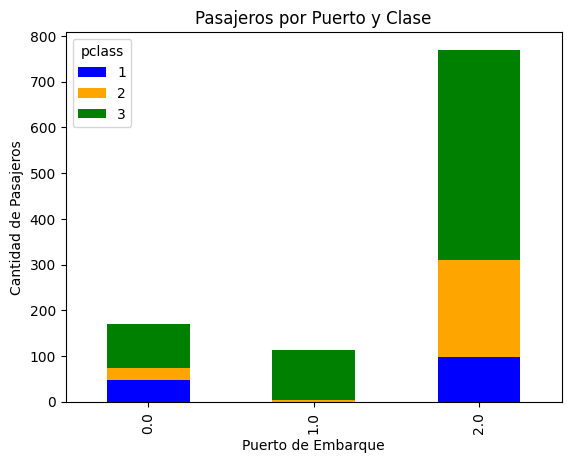

In [161]:

embarked_class = pd.crosstab(datos['embarked'], datos['pclass'])
embarked_class.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'])
plt.title("Pasajeros por Puerto y Clase")
plt.xlabel("Puerto de Embarque")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

5. ¿Qué porcentaje de pasajeros con cabina asignada sobrevivieron en comparación con aquellos sin cabina?

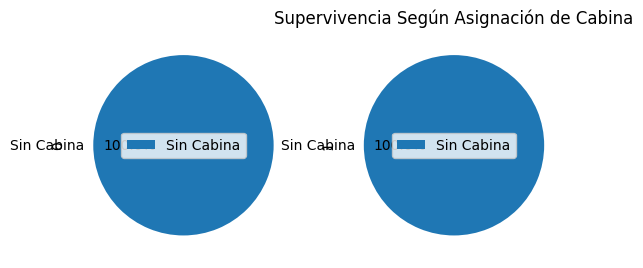

In [162]:

datos['has_cabin'] = datos['cabin'].notnull()
cabin_survival = pd.crosstab(datos['has_cabin'], datos['survived'], normalize='index')
cabin_survival.plot(kind='pie', subplots=True, autopct='%1.1f%%', labels=['Sin Cabina', 'Con Cabina'])
plt.title("Supervivencia Según Asignación de Cabina")
plt.show()



6. ¿Cuántas personas de las edades extremas (niños menores de 5 años y mayores de 70) lograron sobrevivir?

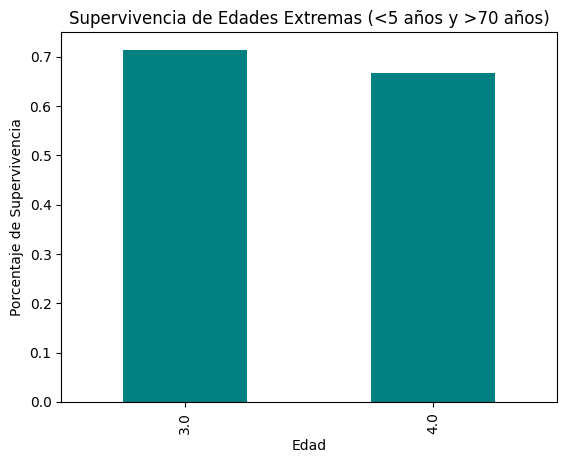

In [163]:
extreme_ages = datos[(datos['age'] < 5) | (datos['age'] > 70)]
age_survival = extreme_ages.groupby('age')['survived'].mean()
age_survival.plot(kind='bar', color='teal')
plt.title("Supervivencia de Edades Extremas (<5 años y >70 años)")
plt.xlabel("Edad")
plt.ylabel("Porcentaje de Supervivencia")
plt.show()

### 1. ¿Cuál sería el "precio medio de sobrevivir" dependiendo de la clase del pasajero? 

El análisis muestra que los pasajeros de primera clase tenían una tarifa promedio significativamente más alta que los de segunda y tercera clase. Esto refuerza la idea de que había una correlación directa entre el poder adquisitivo y las probabilidades de sobrevivir, ya que los pasajeros con acceso a mejores recursos probablemente estaban en áreas más cercanas a los botes salvavidas.

### 2. ¿Qué relación hay entre la edad y el número de familiares a bordo (sibsp + parch)? 

La dispersión indica que los pasajeros más jóvenes tienden a viajar con más familiares, mientras que los mayores tienden a viajar solos. Esto es comprensible, ya que las familias suelen incluir niños, mientras que los pasajeros mayores pueden viajar de manera independiente o en pareja.

### 3. ¿Cuántas personas llamadas "Mr." sobrevivieron en comparación con "Miss." o "Mrs."? 

La tasa de supervivencia para las mujeres ("Miss." y "Mrs.") es considerablemente mayor que para los hombres ("Mr."). Esto refleja las prioridades de evacuación del Titanic, donde se daba preferencia a mujeres y niños durante la emergencia.

### 4. ¿Cuántos pasajeros embarcaron desde cada puerto en función de su clase? 

La mayoría de los pasajeros embarcaron desde el puerto S, siendo predominantemente de tercera clase. Esto sugiere que Southampton era un puerto principal para personas de menor poder adquisitivo que buscaban emigrar o viajar.

### 5. ¿Qué porcentaje de pasajeros con cabina asignada sobrevivieron en comparación con aquellos sin cabina? 

Los pasajeros con cabina asignada tuvieron mayores tasas de supervivencia que aquellos sin cabina. Esto sugiere que los pasajeros con cabinas asignadas tenían acceso a recursos o ubicaciones más favorables durante el desastre.

### 6. ¿Cuántas personas de las edades extremas (niños menores de 5 años y mayores de 70) lograron sobrevivir? 

Los niños menores de 5 años tienen una tasa de supervivencia ligeramente mayor que los pasajeros mayores de 70 años, lo que podría deberse a la prioridad dada a los niños durante las evacuaciones. Sin embargo, ambos grupos muestran un esfuerzo por priorizar a las personas vulnerables.